In [1]:
import os
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_pattern = os.path.join("..", "data", "raw", "*.csv")
file_list = glob.glob(file_pattern) 

In [3]:
file_list

['..\\data\\raw\\1.csv', '..\\data\\raw\\2.csv']

In [4]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [5]:
main_dataframe

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,https://www.cian.ru/sale/flat/315747133/,Москва,sale,flat,10,18,1,32.0,-1,0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315253252/,Москва,sale,flat,71,79,1,79.0,-1,0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити,NEVA TOWERS
2,Mr.Flip,real_estate_agent,https://www.cian.ru/sale/flat/316766731/,Москва,sale,flat,9,16,1,40.8,-1,0,11600000,Бутырский,Яблочкова,25К3,Тимирязевская,NaN
3,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
4,Семен Гордый,realtor,https://www.cian.ru/sale/flat/286050252/,Москва,sale,flat,5,9,1,42.5,-1,0,7150000,NaN,Семена Гордого,12,Крёкшино,Ново-Никольское
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,ИП Боброва Е. И.,real_estate_agent,https://www.cian.ru/sale/flat/315432066/,Москва,sale,flat,6,14,2,56.0,-1,0,22200000,Академический,Губкина,9,Академическая,NaN
51,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/317041390/,Москва,sale,flat,11,26,2,75.0,-1,0,35500000,Раменки,Василия Ланового,3,Аминьевская,Событие
52,OPN PARTNER,real_estate_agent,https://www.cian.ru/sale/flat/315317449/,Москва,sale,flat,3,16,2,37.0,-1,0,13490000,NaN,Анны Ахматовой,11к3,Рассказовка,Городские истории (Рассказовка)
53,Навигатор,real_estate_agent,https://www.cian.ru/sale/flat/312719449/,Москва,sale,flat,29,30,2,60.0,-1,0,31500000,Южнопортовый,Волгоградский проспект,32/3к2,Угрешская,Метрополия


In [6]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

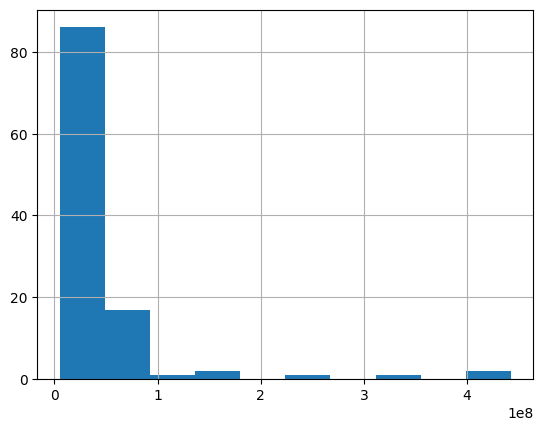

In [7]:
new_dataframe['price'].hist()

In [8]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

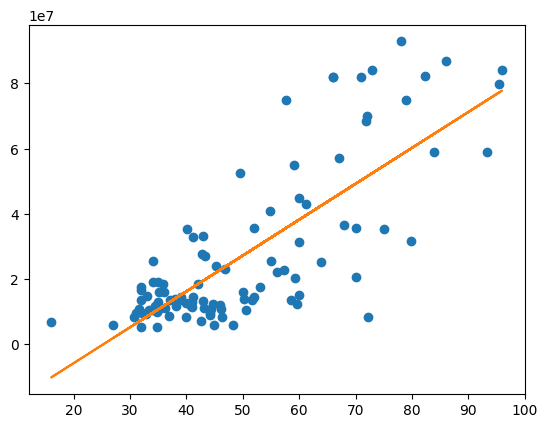

In [9]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

In [10]:
train_path_dir = os.path.join("..", "data", "processed")
if not os.path.exists(train_path_dir):
    os.mkdir(train_path_dir)

train_file_path = os.path.join(train_path_dir, "train.csv")

In [11]:
new_df.to_csv(train_file_path)